In [32]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('kafka_producer_throughput.csv', skipinitialspace=True)

# Kafka producer Perfomance

In [5]:
data.head()

,Nodes,Number_of_points,Number_of_partitions,ttc,system
0,2,10000,24,11.459536,stampede
1,2,10000,24,11.420531,stampede
2,2,10000,24,6.108983,stampede
3,2,100000,24,12.122861,stampede
4,2,100000,24,13.160052,stampede


### Stampede 

In [6]:
stampede_data = data[(data.system == 'stampede')]
stampede_data = data[(data.Nodes==1)]
cols = ['Number_of_points','Number_of_partitions','ttc']
stampede_data =  stampede_data[cols]
plot_data = stampede_data.groupby(['Number_of_points','Number_of_partitions']).mean()
plot_std = stampede_data.groupby(['Number_of_points','Number_of_partitions']).std()
plot_data.unstack()

ttc                       
Number_of_partitions         24         48          96
Number_of_points                                      
1000                   6.967201  13.838080   19.964283
10000                  7.308163  13.743846  131.396094
100000                 7.772343  13.757139   14.400801
1000000                7.583676  15.066808   17.966363
10000000               9.112439  17.013018   21.673558
100000000             22.789890  33.295835   32.835121

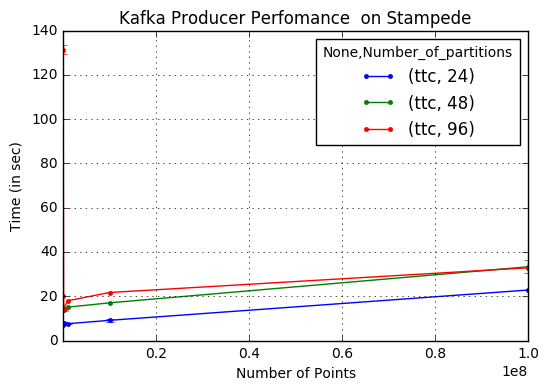

In [10]:
ax = plot_data.unstack().plot(y=['ttc'], 
                      title='Kafka Producer Perfomance  on Stampede', 
                      #legend=None,
                      marker='.',
                      yerr= plot_std.unstack(),
                      #xlim=(0,100000*1000),
                      #xticks = [0,10*1000,100*1000,1000*1000,10000*1000,100000*1000],
                      )
#ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Points")
ax.set_ylabel("Time (in sec)")
ax.grid()
plt.show()
#plt.savefig('rp-streaming_producer_perfomance.pdf')

# Kafka producer throughput

In [33]:
## calculate throuput
data['throughput'] = 0
for i in xrange(data.shape[0]):
    data['throughput'][i] = data['Number_of_points'][i] / data['ttc'][i] 

/Users/giorgos/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
data.head()

,Nodes,Number_of_points,Number_of_partitions,ttc,system,throughput
0,2,10000,24,11.459536,stampede,872
1,2,10000,24,11.420531,stampede,875
2,2,10000,24,6.108983,stampede,1636
3,2,100000,24,12.122861,stampede,8248
4,2,100000,24,13.160052,stampede,7598


In [35]:
stampede_data = data[(data.system == 'stampede')]
stampede_data = data[(data.Nodes==1)]
cols = ['Number_of_points','Number_of_partitions','throughput']
stampede_data =  stampede_data[cols]
plot_data = stampede_data.groupby(['Number_of_points','Number_of_partitions']).mean()
plot_std = stampede_data.groupby(['Number_of_points','Number_of_partitions']).std()
plot_data.unstack()

throughput                          
Number_of_partitions            24          48            96
Number_of_points                                            
1000                  1.430000e+02       72.00  5.000000e+01
10000                 1.370333e+03      727.00  7.566667e+01
100000                1.288667e+04     7273.00  6.957000e+03
1000000               1.318853e+05    66371.00  5.565900e+04
10000000              1.100211e+06   587785.00  4.613910e+05
100000000             4.387937e+06  3021223.75  3.045519e+06

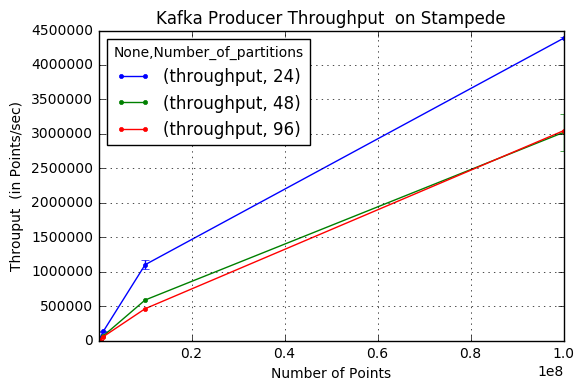

In [39]:
ax = plot_data.unstack().plot(y=['throughput'], 
                      title='Kafka Producer Throughput  on Stampede', 
                      #legend=None,
                      marker='.',
                      yerr= plot_std.unstack(),
                      #xlim=(0,100000*1000),
                      #xticks = [0,10*1000,100*1000,1000*1000,10000*1000,100000*1000],
                      )
#ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Points")
ax.set_ylabel("Throuput  (in Points/sec)")
ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')